In [44]:
import random

import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

In [45]:
signal = lambda t: np.sin(2 * np.pi * t * 5) + np.sin(2 * np.pi * t * 2)
signal_noisy = lambda t: signal(t) + np.random.normal(0, 0.5, t.shape)

In [46]:
def mean_smoother(signal, k):
    out = np.zeros_like(signal)
    for i in range(len(signal) - 2*k):
        for j in range(2*k + 1):
            out[i + k] += signal[i + j]
        out[i + k] /= 2*k + 1
    return out

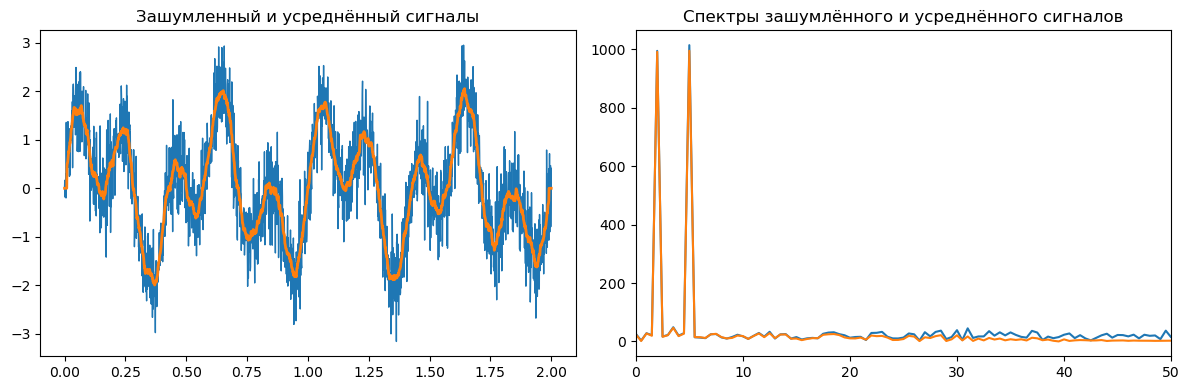

In [47]:
sampling_rate = 1000
duration = 2

t = np.linspace(0, duration, sampling_rate * duration)
noisy_signal = signal_noisy(t)
smoothed_signal = mean_smoother(noisy_signal, 10)

noisy_fft = fft.fft(noisy_signal)
smoothed_fft = fft.fft(smoothed_signal)

freq = fft.fftfreq(duration * sampling_rate, 1 / sampling_rate)[:duration * sampling_rate // 2]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Зашумленный и усреднённый сигналы')
plt.plot(t, noisy_signal, lw=1)
plt.plot(t, smoothed_signal, lw=2)

plt.subplot(122)
plt.title('Спектры зашумлённого и усреднённого сигналов')
plt.xlim((0, 50))
plt.plot(freq, np.abs(noisy_fft[:duration * sampling_rate // 2]))
plt.plot(freq, np.abs(smoothed_fft[:duration * sampling_rate // 2]))
plt.tight_layout()
plt.show()


In [48]:
gauss_generator = lambda w: lambda t: np.exp((-4 * np.log(2) * (t ** 2)) / (w ** 2))


def gauss_smoother(signal, k):
    gauss = gauss_generator(k)
    out = np.zeros_like(signal)
    for i in range(len(signal) - 2 * k):
        for j in range(2 * k + 1):
            out[i + k] += signal[i + j] * gauss(j - k)
        out[i + k] /= k
    return out

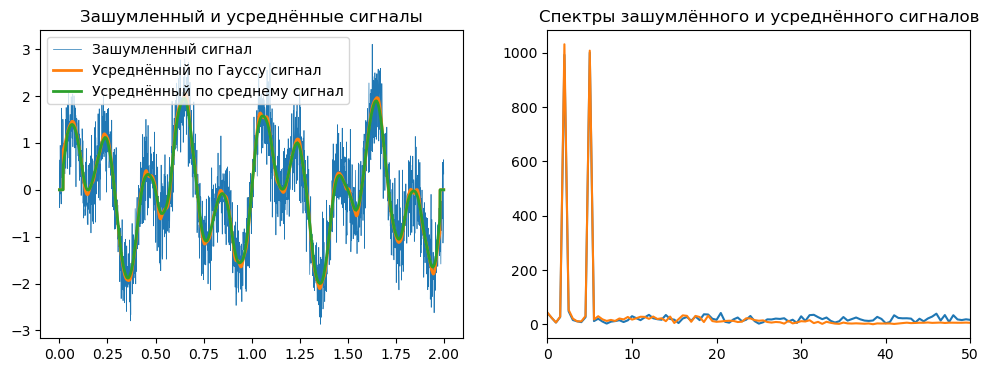

In [49]:
sampling_rate = 1000
duration = 2

t = np.linspace(0, duration, sampling_rate * duration)
noisy_signal = signal_noisy(t)
gauss_smoothed_signal = gauss_smoother(noisy_signal, 20)
mean_smoothed_signal = mean_smoother(gauss_smoothed_signal, 20)

noisy_fft = fft.fft(noisy_signal)
smoothed_fft = fft.fft(gauss_smoothed_signal)

freq = fft.fftfreq(duration * sampling_rate, 1 / sampling_rate)[:duration * sampling_rate // 2]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Зашумленный и усреднённые сигналы')
plt.plot(t, noisy_signal, lw=0.5, label='Зашумленный сигнал')
plt.plot(t, gauss_smoothed_signal, lw=2, label='Усреднённый по Гауссу сигнал')
plt.plot(t, mean_smoothed_signal, lw=2, label='Усреднённый по среднему сигнал')
plt.legend()

plt.subplot(122)
plt.title('Спектры зашумлённого и усреднённого сигналов')
plt.xlim((0, 50))
plt.plot(freq, np.abs(noisy_fft[:duration * sampling_rate // 2]))
plt.plot(freq, np.abs(smoothed_fft[:duration * sampling_rate // 2]))
plt.show()

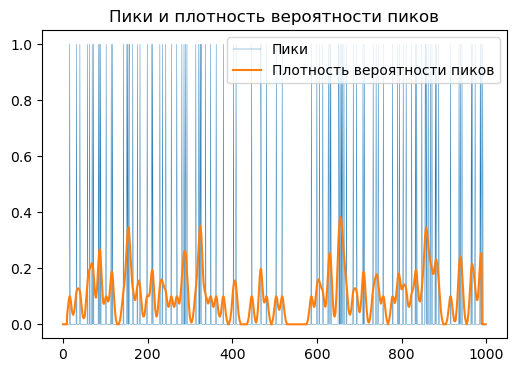

In [50]:

n = 1000
sample_ratio = 0.1

signal = np.zeros(n)

for sample in random.sample(range(n), int(n * sample_ratio)):
    signal[sample] = 1

gauss_smoothed_signal = gauss_smoother(signal, 10)

plt.figure(figsize=(6, 4))
plt.title('Пики и плотность вероятности пиков')
plt.plot(signal, lw=0.3, label='Пики')
plt.plot(gauss_smoothed_signal, label='Плотность вероятности пиков')
plt.legend(loc='upper right')
plt.show()

In [51]:
def median_smoother(signal, k):
    out = np.zeros_like(signal)
    for i in range(len(signal) - 2 * k):
        out[i + k] = np.median([signal[i - k + num] for num in range(2 * k + 1)])
    return out

In [52]:
sampling_rate = 1000
duration = 2

t = np.linspace(0, duration, sampling_rate * duration)
noisy_signal = signal_noisy(t)
smoothed_signal = median_smoother(noisy_signal, 10)

noisy_fft = fft.fft(noisy_signal)
smoothed_fft = fft.fft(smoothed_signal)

freq = fft.fftfreq(duration * sampling_rate, 1 / sampling_rate)[:duration * sampling_rate // 2]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Зашумленный и усреднённый сигналы')
plt.plot(t, noisy_signal, lw=0.3)
plt.plot(t, smoothed_signal, lw=2)

plt.subplot(122)
plt.title('Спектры зашумлённого и усреднённого сигналов')
plt.xlim((0, 50))
plt.plot(freq, np.abs(noisy_fft[:duration * sampling_rate // 2]))
plt.plot(freq, np.abs(smoothed_fft[:duration * sampling_rate // 2]))
plt.tight_layout()
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
trend_k = 2
trend_b = 0
trend = lambda t, k, b: t * k + b

sampling_rate = 1000
duration = 2

t = np.linspace(0, duration, sampling_rate * duration)

y = signal(t)
y_trend = y + trend(t, trend_k, trend_b)

plt.plot(t, y)
plt.plot(t, y_trend)
plt.show()

e1 = np.sum(np.pow(np.subtract(y_trend, y), 2)) / len(y)
BIC1 = len(y) * np.log(e1) + 2 * np.log(len(y))

e2 = np.sum(np.pow(np.subtract(y, y), 2)) / len(y)
BIC2 = len(y) * np.log(e2 + 0.0000001) + 2 * np.log(len(y))

print(BIC1, BIC2)